In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style
#===========================================================================================
df = pd.read_csv('insurance.csv')
#======================================================================================
age = df.value_counts('age')
male = df[df['sex'] == 'male']
female =df[df['sex'] == 'female']
smoker = df[df['smoker'] == 'yes']
no_smoker = df[df['smoker'] == 'no']
#===============================================================================================
df['age_group'] = df['age'].apply(lambda x: x // 10)
#=========================================================================================
smoker_count = smoker.shape[0]
no_smoker_count = no_smoker.shape[0] 
#==========================================================================================
southwest = df[df['region'] == 'southeast']
northwest = df[df['region'] == 'northwest']
southeast = df[df['region'] == 'southeast']
northeast = df[df['region'] == 'northeast']
#===========================================================================================
northeast.head(5)

,age,sex,bmi,children,smoker,region,charges,age_group
8,37,male,29.830,2,no,northeast,6406.41070,3
10,25,male,26.220,0,no,northeast,2721.32080,2
16,52,female,30.780,1,no,northeast,10797.33620,5
17,23,male,23.845,0,no,northeast,2395.17155,2
20,60,female,36.005,0,no,northeast,13228.84695,6


W tym krótkim projekcie z danymi dostarczonymi przez codecademy.com pokaże pewne zależności w prywatnym sektorze ubezpieczeń w Stanach Zjednoczonych.

Jak widać na poniższej wizualizacji, najwięcej ludzi ponosi koszt ubezpieczenia w okolicach 10 tys.$ lub trochę mniej.Występuje naturalna zależność: wraz ze wzrostem kosztów ubezpieczenia maleje liczba osób które takie koszty ponosi.

c:\Users\Hubert Domagala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


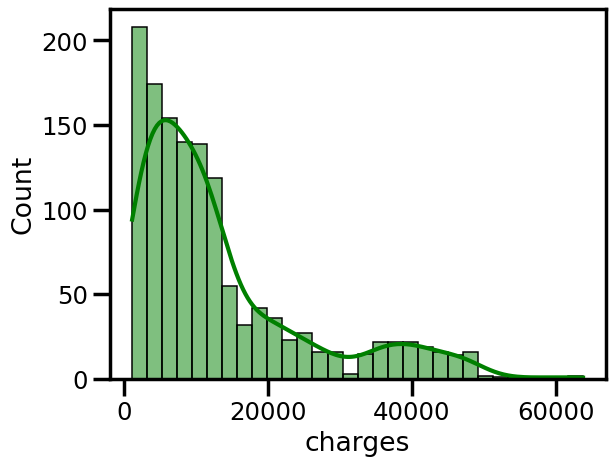

In [3]:
sns.set_context('poster', font_scale=0.8)
sns.histplot(data=df, x='charges', kde=True, bins=30, color='green',binwidth=None,
             line_kws=None,
            edgecolor = 'Black')
plt.show()

Na poniższym wykresie można zauważyć że dystrybucja wieku ma rozkład normalny.Jeżeli chodzi o wiek to, to wszystko zależy od naszej wylosowanej próby.Wykres udowadnia że w USA bmi nie jest silnie skorelowane z wiekiem.

c:\Users\Hubert Domagala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hubert Domagala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1800x2000 with 0 Axes>

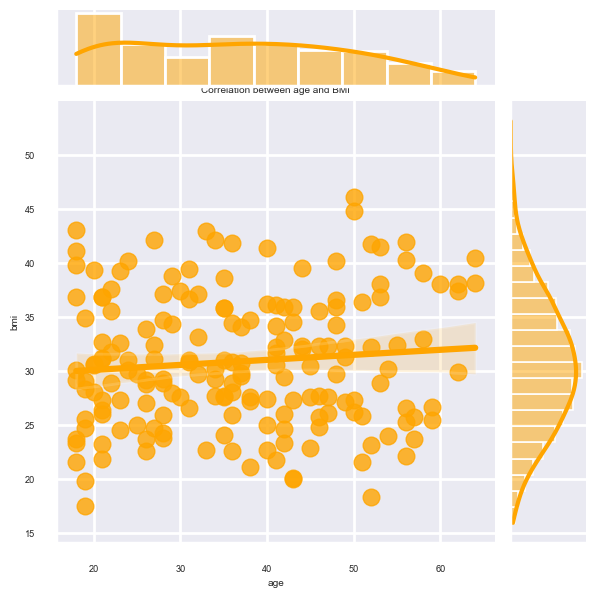

In [4]:

random_sample_for_age = df['age'].sample(180)
random_sample_for_bmi = df['bmi'].sample(180)
sns.set_style('darkgrid')
plt.figure(figsize=(18,20))
sns.set_context('poster', font_scale=0.3)  #tutaj elegancko można zmieniac kontent
sns.jointplot(x=random_sample_for_age, y='bmi', data=df, kind='reg', color = 'orange')
sns.despine(left=False)
plt.title("Correlation between age and BMI")
plt.show()

Wykres kołowy ukazuje nam że w zbiorze danych mamy tylko 20% palaczy 

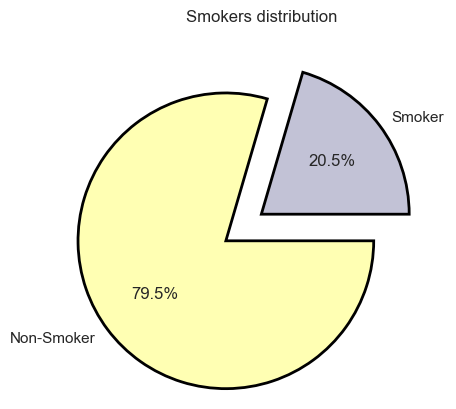

In [5]:
#=============================#DIFFERENCES IN COUNTS 
sns.set_context('poster', font_scale=0.5)
smoker_label = ['Smoker', 'Non-Smoker']
smokerss = [smoker_count, no_smoker_count]
colors = ['#c2c2d6', '#ffffb3']
explode = [0, 0.3]
plt.pie(smokerss, labels=smoker_label, autopct='%1.1f%%', 
        colors = colors,
       wedgeprops = {'edgecolor': 'black'},
       explode=explode)
plt.title('Smokers distribution')
plt.show()

Jak widać poniżej palenie nie popłaca ze względu na zdecydowannie wyższą mediane kosztów dla palaczy różnica wynosi aż 27110.94$

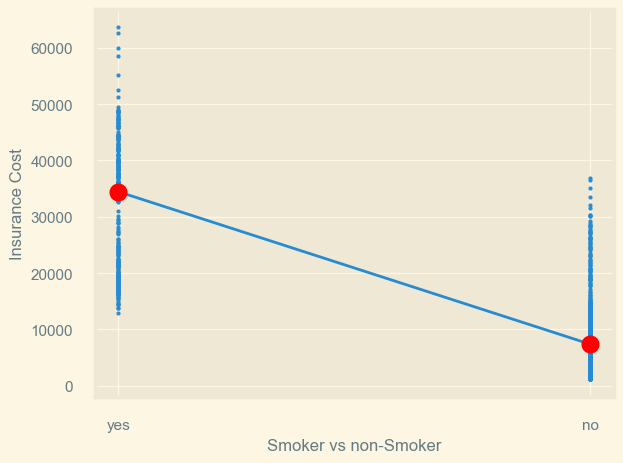

Difference between smoker and no-smoker is : 27110.94


In [6]:
#SMOKERS AND PRICE OF INSURENCE
sns.set_context('poster', font_scale=0.5)
plt.style.use('Solarize_Light2')
median_charges_smoker = np.median(smoker.charges)
median_charges_no_smoker = np.median(no_smoker.charges)
difference = median_charges_smoker - median_charges_no_smoker
difference = round(difference, 2)
plt.scatter(df.smoker, df.charges, s=1)
plt.plot(['yes', 'no'], [median_charges_smoker, median_charges_no_smoker])
plt.plot('yes', median_charges_smoker, 'ro')
plt.plot('no', median_charges_no_smoker, 'ro')
#plt.axvline(median_charges_smoker, color='red', label='Median')
plt.xlabel('Smoker vs non-Smoker')
plt.ylabel('Insurance Cost')
#plt.legend('Median Point')
plt.tight_layout()
plt.show()

print('Difference between smoker and no-smoker is : ' + str(difference))

Heatmapa nie pokazuje żadnych znaczących korelacji pomiędzy kolumnami danych.

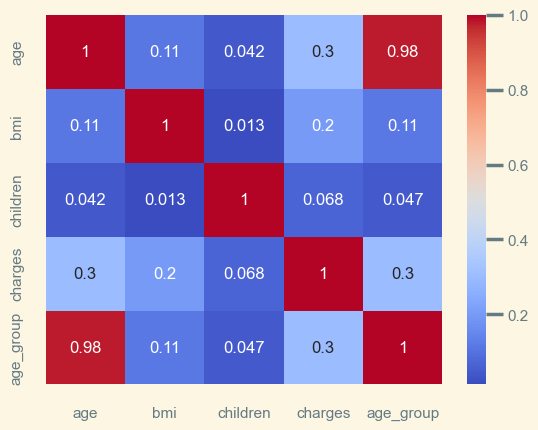

In [7]:
#heatmap correltaion
sns.set_context('poster', font_scale=0.5)
corr = df.select_dtypes('number').corr()
#print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Poniższy wykres ma potencjał ale nie wiem jak nie sumowac każdą kolejną grupe :(. Nie chciałem po raz kolejny używać barplotu.

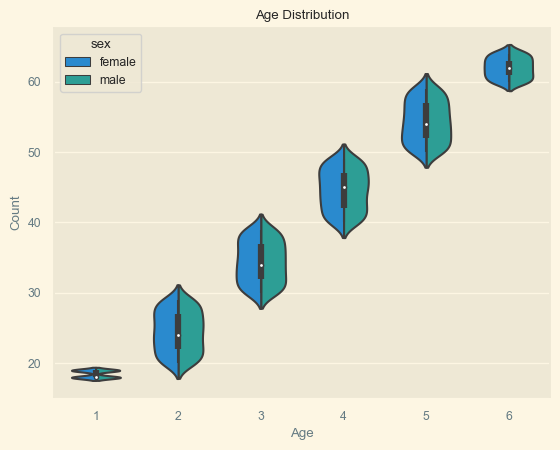

In [8]:
#=============================#AGE DISTRIBUTION===============================
#Tutaj mam problem bo każda następna grupa wiekowa się dodaje 
sns.set_context('notebook', font_scale=0.8)
sns.violinplot(x ='age_group', y='age' ,  data=df,
               hue='sex', 
               split=True, 
               width=0.6, 
               saturation=0.95)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Rozkład w wieku w naszym datasecie.

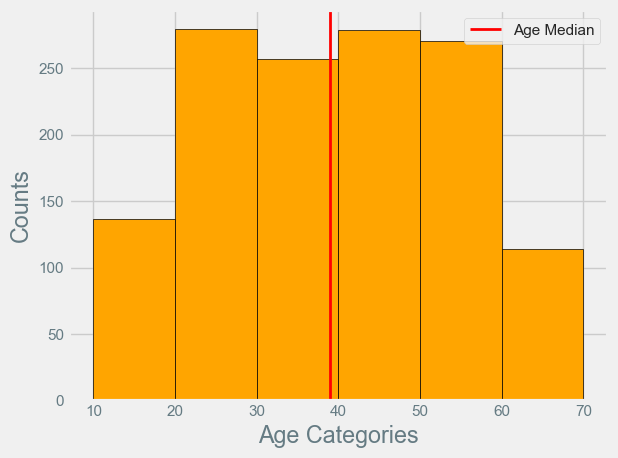

In [10]:
sns.set_context('poster', font_scale=0.5)
ages = df['age']
median_age = np.median(df.age)
#make list of divided groups
bins = [10, 20, 30, 40, 50, 60, 70]
plt.style.use('fivethirtyeight')
plt.hist(x=ages, bins=bins, edgecolor='black', color='orange')  
plt.xlabel('Age Categories')
plt.ylabel('Counts')
plt.axvline(median_age, color='red', label='Age Median', linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()


Poniższa wizualizacja prezentuje rozrzut obserwacji ze względu na wiek i koszty ubezpieczenia w regionie South-West. 

C:\Users\Hubert Domagala\AppData\Local\Temp\ipykernel_7480\488192663.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(age_southwest, southwest.charges, color='red', label='SthEast',


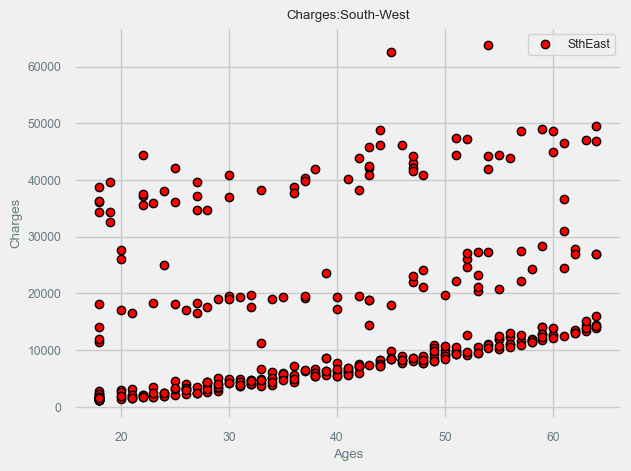

In [11]:
sns.set_context('notebook', font_scale=0.8)

southwest.head(5)
age_southwest = southwest['age']
plt.scatter(age_southwest, southwest.charges, color='red', label='SthEast',
           cmap='winter',
            edgecolor='black',)
plt.legend()

plt.title('Charges:South-West')
plt.xlabel('Ages')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()